# TP4 suite

# Analyse de la thématique des travaux liés aux transports en commun à Bruxelles

### Imports

In [1]:
# Tous les imports liés à notre thématique 
# Extraction de keywords
import os
import yake
# WordCloud et stopwords
from collections import Counter
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from PIL import Image
import PIL.Image
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
#Graphes et tableaux
import matplotlib.pyplot as plt
import numpy as np
from os import path, getcwd
import re
import matplotlib as mpl
from tabulate import tabulate
from numpy import zeros,array
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Extraction de keywords et nettoyage des fichiers

### Extraire les mots clés d'un document avec Yake 

In [2]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général", "bruxelles", "conseil supérieur", "belgique",
               "administration communale", "conseil provincial", "administration générale", "administration supérieure"])
ignored

{'administration communale',
 'administration générale',
 'administration supérieure',
 'belgique',
 'bruxelles',
 'conseil communal',
 'conseil général',
 'conseil provincial',
 'conseil supérieur'}

In [3]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [4]:
# Lister les Fichiers
data_path = "../data/txt/"

In [5]:
# Toute les années 
all_years = [str(year) for year in range(1847, 1978)]

In [6]:
# Enlever les fichiers qui ne commencent pas par Bxl_
files = sorted(os.listdir(data_path))
bxl_files = [f for f in files if f.startswith('Bxl_')]
len(bxl_files)

2677

In [7]:
# Choisir un fichier
this_file = bxl_files[0]
this_file

'Bxl_1847_Tome_I1_Part_1.txt'

In [8]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

"V I L L E DE\n\nBRUXELLES\n\nbulletin ires 8éanas\nDl!\n\nCONSEIL\n\nCOMMUNAL\n\nANNÉE\n\n1847.\n\n\x0cAU\n\n\x0cVILLE DE B R U X E L L E S .\n\nbulletin\n\nCONSEIL\n\nàes\n\nSéances\n\nCOMMUNAL.\n\nANNÉE\n\n1847.\n\nBRUXELLES,\nIMPRIMERIE\n\nD E J . H. B R I A R D ,\n\nRITE N E U V E , 3 1 , FAUBOURG DE N A M U R ,\n\n1 84 8\n\n\x0cDE!\n\nDU CONSEI\nDîBÏ\n\nE. - Communication\nconclusions de la section des\ndu nouvel hospice pour les av\n\nEnraisonde l'absence &\nmaladie.le Conseil ajourne\nleurs de pierre el marchai\ncles des taxes communale'\nbieniàance e"

In [9]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [10]:
keywords

[('marché', 0.00015029560074715333),
 ('dans', 0.00025307923380123577),
 ('CONSEIL', 0.0002896026299095025),
 ("d'un marché couvert", 0.00038300149546329404),
 ('marchés couverts', 0.0004276960207809479),
 ('marchés', 0.0004407998491711812),
 ("d'un marché dans", 0.00047380845640108494),
 ("d'un marché", 0.0005054375296920362),
 ('VILLE', 0.0005449628477985323),
 ('marché couvert', 0.0005583809160195709),
 ('nouveau marché', 0.0006935528782713473),
 ("l'établissement d'un marché", 0.0007124503616443153),
 ('marché dans', 0.0009249108286977143),
 ('Bortier', 0.0009602384499736716),
 ("qu'il", 0.0010280312600004049),
 ('rue', 0.0011547164914727408),
 ('BRUXELLES', 0.0012658247679985801),
 ("d'un", 0.0014453642815040189),
 ("construction d'un marché", 0.00152548007392674),
 ('Conseil général', 0.0015984204266513492),
 ('marché Saint-Jean', 0.0016222814416333386),
 ('CONSEIL COMMUNAL', 0.0017261255673432948),
 ("c'est", 0.0019181549803940444),
 ("ville d'un marché", 0.0019310426378027572),

In [11]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

['marchés couverts',
 "d'un marché",
 'marché couvert',
 'nouveau marché',
 'marché dans',
 'marché Saint-Jean',
 'marché projeté',
 'Conseil central',
 'rue Royale',
 'Société Philanthropique']

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [12]:
# Stopwords
sw = stopwords.words("french", "dutch")
sw += ["les", "plus", "cette", "faire", "deux", "bien", "après", "ainsi", "cet",
       "celle", "entre", "toutes", "pendant", "dire", "non", "faut", "trois", 
       "aussi", "dit", "contre", "autres", "van", "het", "autre", "jusqu", "ville", 
       "alors", "juste", "sujet", "au", "la", "sur", "aucuns", "le", "ta", "tandis", 
       "leur", "tellement", "avant", "là", "tels", "avec", "ma", "tes","avoir", 
       "maintenant", "ton", "bon", "car", "mais", "tous", "cela", "mes", "tout", "ce", 
       "mien", "trop", "moins", "très", "mon", "tu", "mot", "ces", "chaque", "voient", 
       "même", "vont", "ceux", "ni", "votre", "ci", "nommés", "vous", "comment", "comme", 
       "notre", "vu", "dans",  "nous", "ça", "des", "ou", "étaient", "dedans", "du", "où", 
       "état", "par",  "étions", "dehors", "parce", "été", "depuis", "pas", "être", "devrait", 
       "peut",  "doit", "peu", "donc", "plupart", "dos", "pour", "début", "pourquoi", "elle",  
       "quand", "elles", "que", "on", "quel", "encore", "quelle", "essai", "quelles",  "et", 
       "quels", "est", "qui", "eu", "sa", "fait", "son", "faites", "ses", "fois",  "seulement", 
       "font", "si", "hors", "sien", "ici", "sans", "il", "sont", "ils",  "sous", "je", "soyez", 
       "voor", "een", "aan", 'met', 'door']
      
sw = set(sw)

In [13]:
# Choisir une année 
year = '1970'

In [14]:
# Lister les fichiers du document
data_path = '../data'
txt_path = "../data/txt"
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1970_Tome_I1_Part_1.txt',
 'Bxl_1970_Tome_I1_Part_10.txt',
 'Bxl_1970_Tome_I1_Part_11.txt',
 'Bxl_1970_Tome_I1_Part_12.txt',
 'Bxl_1970_Tome_I1_Part_13.txt',
 'Bxl_1970_Tome_I1_Part_2.txt',
 'Bxl_1970_Tome_I1_Part_3.txt',
 'Bxl_1970_Tome_I1_Part_4.txt',
 'Bxl_1970_Tome_I1_Part_5.txt',
 'Bxl_1970_Tome_I1_Part_6.txt',
 'Bxl_1970_Tome_I1_Part_7.txt',
 'Bxl_1970_Tome_I1_Part_8.txt',
 'Bxl_1970_Tome_I1_Part_9.txt',
 'Bxl_1970_Tome_I2_Part_1.txt',
 'Bxl_1970_Tome_I2_Part_10.txt',
 'Bxl_1970_Tome_I2_Part_11.txt',
 'Bxl_1970_Tome_I2_Part_12.txt',
 'Bxl_1970_Tome_I2_Part_13.txt',
 'Bxl_1970_Tome_I2_Part_14.txt',
 'Bxl_1970_Tome_I2_Part_2.txt',
 'Bxl_1970_Tome_I2_Part_3.txt',
 'Bxl_1970_Tome_I2_Part_4.txt',
 'Bxl_1970_Tome_I2_Part_5.txt',
 'Bxl_1970_Tome_I2_Part_6.txt',
 'Bxl_1970_Tome_I2_Part_7.txt',
 'Bxl_1970_Tome_I2_Part_8.txt',
 'Bxl_1970_Tome_I2_Part_9.txt',
 'Bxl_1970_Tome_II1_Part_1.txt',
 'Bxl_1970_Tome_II1_Part_10.txt',
 'Bxl_1970_Tome_II1_Part_11.txt',
 'Bxl_1970_Tome_II1_Part_2

In [15]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [16]:
# Compter le nombre de fichiers dans la liste
len(content_list)

55

In [17]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE DE\n\nSTAD\nBRUSSEL\n\nBRUXELLES\n\nBULLETIN\nCOMMUNAL\nGEMEENTEBLAD\nI\n\nIMPRIMERIE H. ET M. SCHAUMANS, S. A.\nParvis Saint-Gilles, 41\nBruxelles 6\n1970\n\n\x0c\x0cVILLE DE\n\nSTAD\nBRUSSEL\n\nBRUXELLES\n\nBULLETIN\n\nCOMMU'

In [18]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tp4/tmp_suite'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [19]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE DE\n\nSTAD\nBRUSSEL\n\nBRUXELLES\n\nBULLETIN\nCOMMUNAL\nGEMEENTEBLAD\nI\n\nIMPRIMERIE H. ET M. SCHAUMANS, S. A.\nParvis Saint-Gilles, 41\nBruxelles 6\n1970\n\n\x0c\x0cVILLE DE\n\nSTAD\nBRUSSEL\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\nGEMEENTEBLAD\nAnnée — Jaargang\n1970\nN . 1.\n\nCONSEIL C O M M U N A L — G E M E E N T E R A A D\nSéance\n\ndu — Zitting\n9-1-1970.\n\nvan\n\nPRESIDENT — VOORZITTER\nM.-de heer Lucien\n\nCOOREMANS,\n\nBourgmestre — Burgemeester.\n\n— L a séance est ouverte à 16 heures.\n— De zitting wordt geopend te 16 uur.\n\nPrése'

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [20]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [21]:
# Nettoyer
clean_text(year, folder=temp_path)

'Output has been written in ../data/tp4/tmp_suite/1970_clean.txt!'

In [22]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'stad brussel bruxelles bulletin communal gemeenteblad imprimerie schaumans parvis saint gilles bruxelles stad brussel bruxelles bulletin communal gemeenteblad année jaargang conseil séance zitting president voorzitter heer lucien cooremans bourgmestre burgemeester séance ouverte heures zitting wordt geopend uur présents zijn aanwezig heer cooremans bourgmestre burgemeester heer rons mevr leynseele heren morelle halteren vanden boeynants echevins schepenen heren boeck janvier grauw mevr cristojov'

## Afficher les termes les plus fréquents dans un WordCloud

In [23]:
frequencies = Counter(after.split())

print(frequencies.most_common(10))

[('conseil', 2272), ('francs', 2166), ('bruxelles', 1925), ('publique', 1913), ('article', 1907), ('collège', 1813), ('budget', 1742), ('communal', 1605), ('rue', 1590), ('travaux', 1558)]


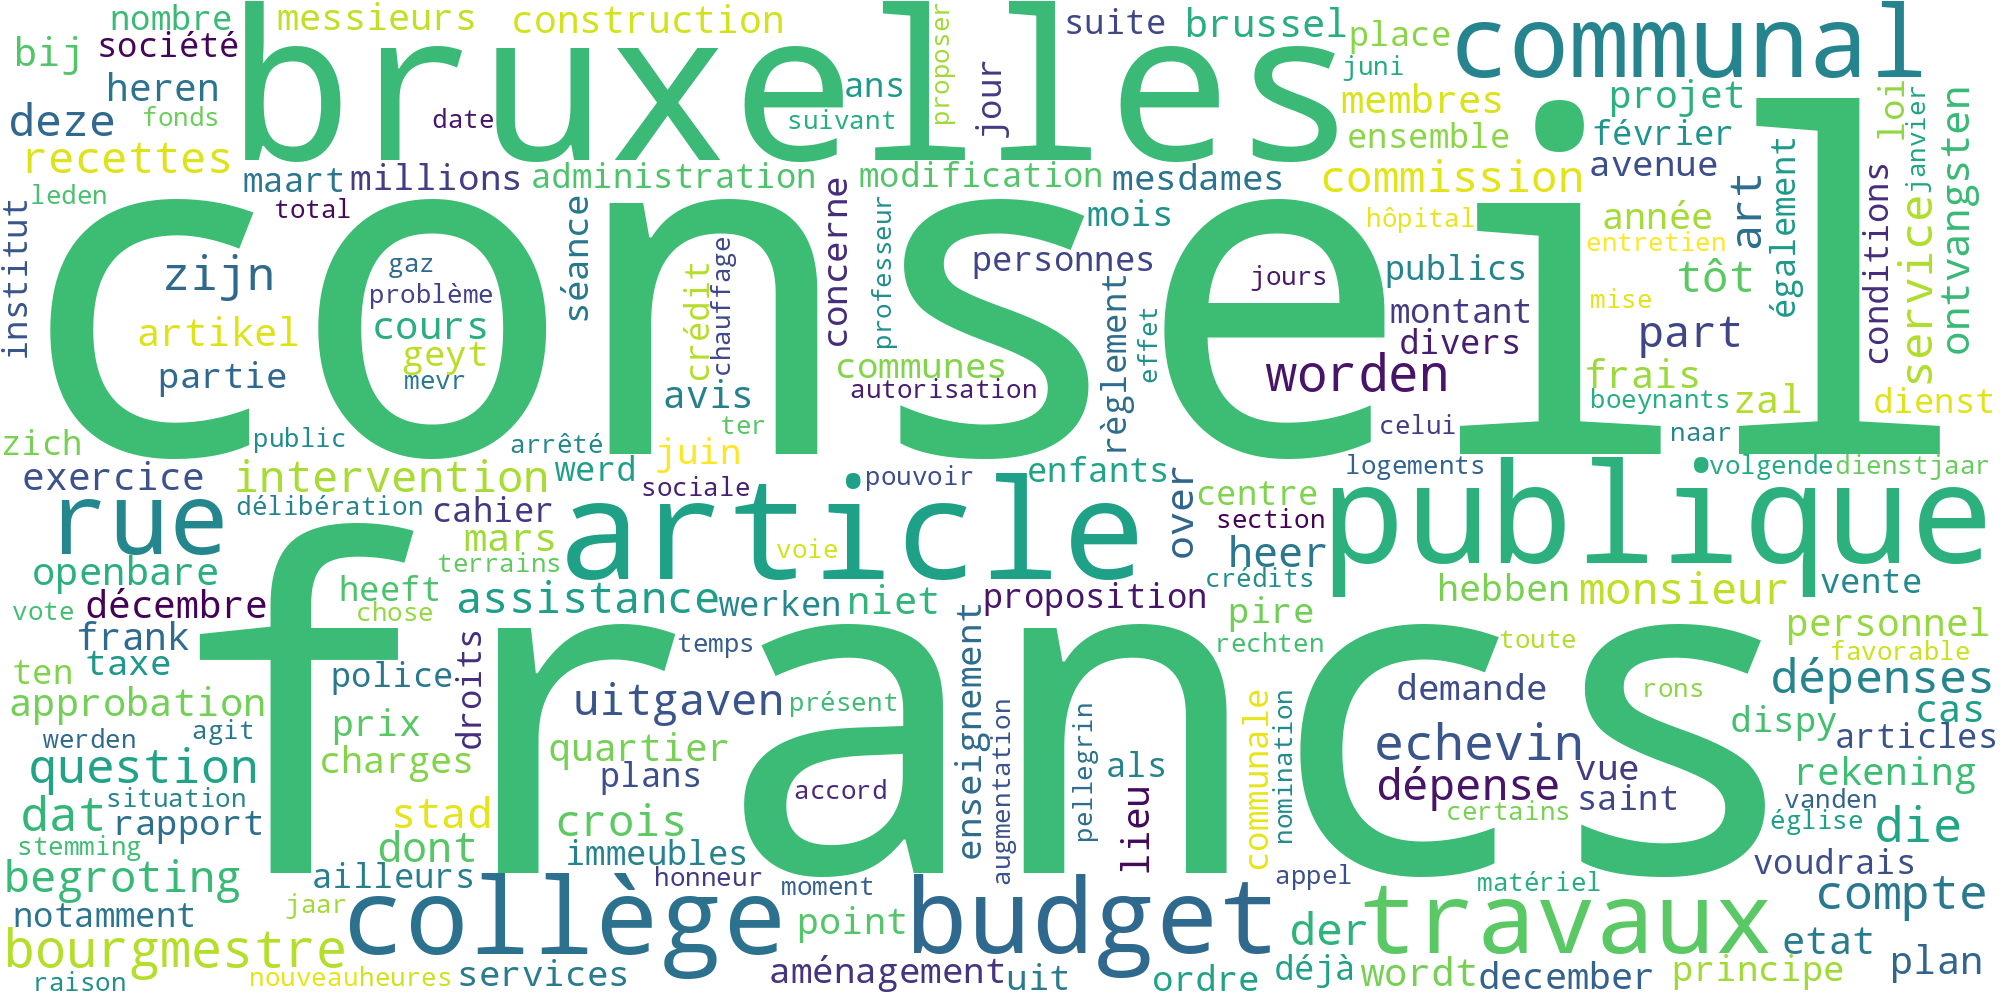

In [24]:
wordcloud = WordCloud(stopwords = sw,
                      collocations=True).generate(text)
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Comparaison de la fréquence des mots liés aux transports en commun

In [25]:
all_years = [str(year) for year in range(1847, 1978)]

In [26]:
# Tous les documents du fichier bulletin
data_path = '../data'
txt_path = "../data/txt"
txts = sorted(os.listdir(txt_path))
len(txts)

2677

In [27]:
# Le nombre d'occurrences des transports en commun dans le fichier comportant toutes les années
transportdoc = []
def check_if_exists(x, ls, r):
    if x in ls:
        transportdoc.append(r)
        
files = os.listdir(txt_path)

for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('transport', jstring, q)
print("Le mot 'transport' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('transports', jstring, q)
print("Le mot 'transports' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('métro', jstring, q)
print("Le mot 'métro' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('métros', jstring, q)
print("Le mot 'métros' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('tramway', jstring, q)
print("Le mot 'tramway' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('tramways', jstring, q)
print("Le mot 'tramways' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('bus', jstring, q)
print("Le mot 'bus' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('autobus', jstring, q)
print("Le mot 'autobus' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 

for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('train', jstring, q)    
print("Le mot 'train' est présent dans "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('trains', jstring, q)    
print("Le mot 'trains' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('STIB', jstring, q)    
print("Le mot 'STIB' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('De Lijn', jstring, q)    
print("Le mot 'De Lijn' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents")
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('TEC', jstring, q)    
print("Le mot 'TEC' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents")
for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('SNCV', jstring, q)    
print("Le mot 'SNCV' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 

for q in files:
    with open(os.path.join(txt_path, q), 'r', encoding = "ISO-8859-1") as j:
         jlist = [(j.read())]
         jstring = ''.join(str(jlist))
         
         check_if_exists('SNCB', jstring, q)    
print("Le mot 'SNCB' est présent "+ str(len(transportdoc)) + " fois dans " + str(len(content_list)) + " documents") 

Le mot 'transport' est présent 1998 fois dans 2677 documents
Le mot 'transports' est présent 3061 fois dans 2677 documents
Le mot 'métro' est présent 3061 fois dans 2677 documents
Le mot 'métros' est présent 3061 fois dans 2677 documents
Le mot 'tramway' est présent 4172 fois dans 2677 documents
Le mot 'tramways' est présent 5150 fois dans 2677 documents
Le mot 'bus' est présent 7361 fois dans 2677 documents
Le mot 'autobus' est présent 7911 fois dans 2677 documents
Le mot 'train' est présent dans 9201 fois dans 2677 documents
Le mot 'trains' est présent 9373 fois dans 2677 documents
Le mot 'STIB' est présent 9380 fois dans 2677 documents
Le mot 'De Lijn' est présent 9380 fois dans 2677 documents
Le mot 'TEC' est présent 9699 fois dans 2677 documents
Le mot 'SNCV' est présent 9699 fois dans 2677 documents
Le mot 'SNCB' est présent 9699 fois dans 2677 documents


In [28]:
# Tableau simplifiant l'output ci-dessus
table = [['Mots', 'Occurrences'], ['Transports', 3061], ['Métros', 3061], ['Tramways', 5150], 
         ['Autobus', 7911], ['Trains', 9373], ['STIB', 9380], ['De Lijn', 9380], ['TEC', 9699], ['SNCV', 9699], ['SNCB', 9699]]
print(tabulate(table, tablefmt='fancy_grid'))

╒════════════╤═════════════╕
│ Mots       │ Occurrences │
├────────────┼─────────────┤
│ Transports │ 3061        │
├────────────┼─────────────┤
│ Métros     │ 3061        │
├────────────┼─────────────┤
│ Tramways   │ 5150        │
├────────────┼─────────────┤
│ Autobus    │ 7911        │
├────────────┼─────────────┤
│ Trains     │ 9373        │
├────────────┼─────────────┤
│ STIB       │ 9380        │
├────────────┼─────────────┤
│ De Lijn    │ 9380        │
├────────────┼─────────────┤
│ TEC        │ 9699        │
├────────────┼─────────────┤
│ SNCV       │ 9699        │
├────────────┼─────────────┤
│ SNCB       │ 9699        │
╘════════════╧═════════════╛


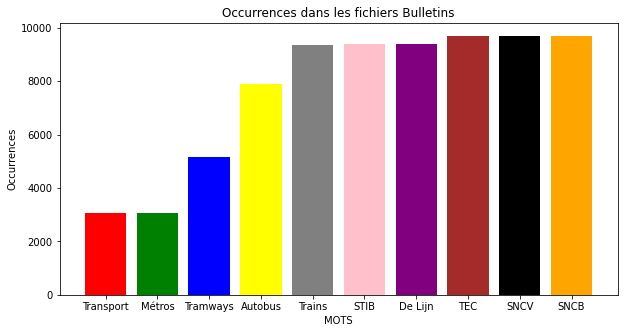

In [29]:
# Graphe reprenant l'output

# taille du graphique
plt.figure(figsize = (10,5))

# titre du graphique
plt.title('Occurrences dans les fichiers Bulletins')

# nombre de barres dans l'axe x
left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# hauteurs de l'axe y
height = [3061, 3061, 5150, 7911, 9373, 9380, 9380, 9699, 9699, 9699]

# noms des barres de l'axe x
tick_label = ['Transport', 'Métros', 'Tramways', 'Autobus', 'Trains', 'STIB', 'De Lijn', 'TEC', 'SNCV', 'SNCB']

# couleurs des barres
plt.bar(left, height, tick_label = tick_label,
width = 0.8, color = ['red', 'green', 'blue', 'yellow', 'grey', 'pink', 'purple', 'brown', 'black', 'orange'])

# non de l'axe x
plt.xlabel('MOTS')
# nom de l'axe y
plt.ylabel('Occurrences')

# générer le graphe
plt.show()